<a href="https://colab.research.google.com/github/sherjahong1r/Machine-Learning-Lessons/blob/main/03_Amaliyot_scikit_learn_Simple_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amaliyot. scikit-learn Simple LR**

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [252]:
dff = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv")
dff.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [253]:
dff.shape

(200, 4)

## Yuqoridagi jadvalda Mohirdev MCHJ tomonidan turli OAV larda (TV, Radio, Newspaper) berilgan reklamalar soni va mos keluvchi savdolar (Sales) berilgan.

Sizning vazifangiz:
1. Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
2. Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.

Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida Simple Linear Regression model yaratish:

CRISP-DM metodologiyasiga amal qiling!
Simple linear regression qo'llash uchun 1 ta ustunni tanlab oling.

## Vazifa:

Yuqoridagi Salesga ta'sir qilayotgan bitta ustunni topib uni
Scikit-learn yordamida hisoblash?

In [254]:
dff.corr()
# Ko'rishimiz mumkin Salesga eng yuqori korrelyasiya bu TV ustuni ekan.

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [255]:
df = df[['TV', 'Sales']]
df
# Ikkalasini alohida df ga saqlab olyabmiz

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


## Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

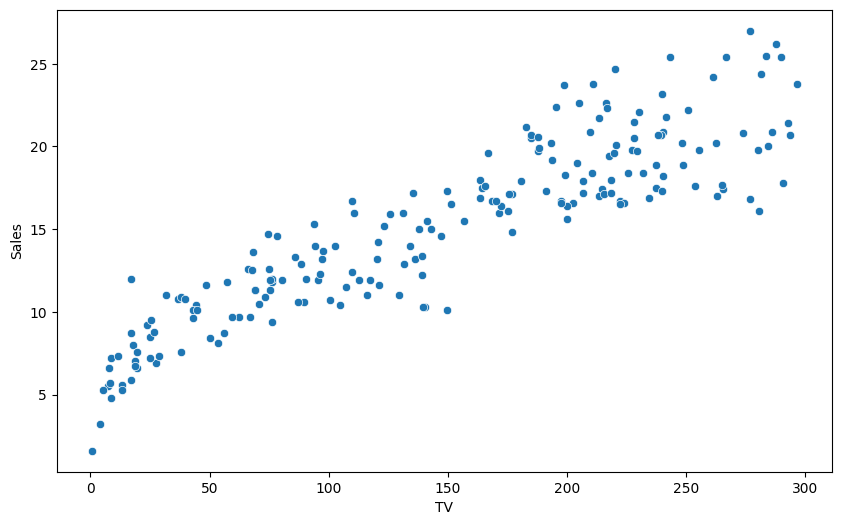

In [257]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.show()

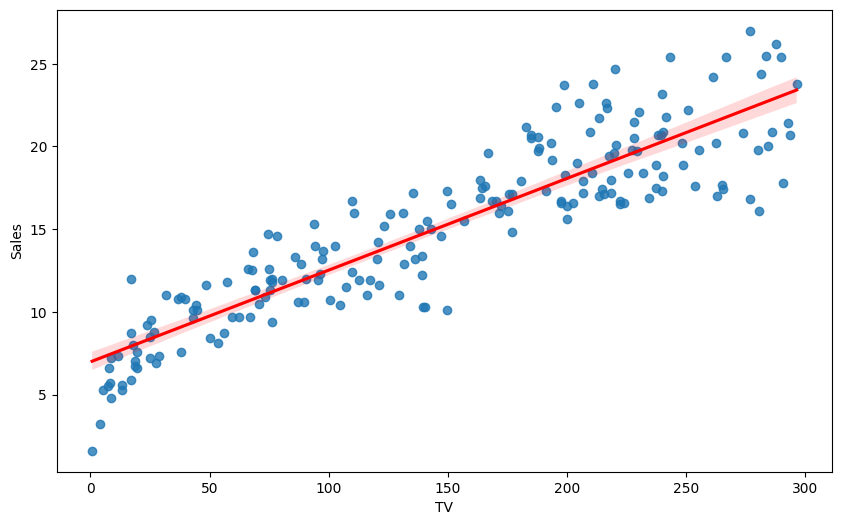

In [258]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='TV', y='Sales', line_kws={"color": "red"})
plt.show()

# **NEW SECTION**

# **Scikit-learn yordamida LR**

In [259]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.50, random_state=42)

Agar test_size foizini oshirsak, ya'ni test ma'lumotlari hajmini kattalashtirsak, train_set (o'qitish ma'lumotlari) hajmi kamayadi. Modelni o'qitish uchun kamroq ma'lumot qolsa, model ma'lumotlardagi naqshlarni yaxshiroq o'rgana olmaydi va natijada uning aniqligi (accuracy) yoki bashorat qilish qobiliyati (generalization) pasayishi mumkin. Shuning uchun, test to'plamining katta bo'lishi modelning aniqligini pastroq ko'rsatishi mumkin, chunki model yaxshi o'qitilmagan bo'ladi.

## Linear Regression ML

In [260]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

# theta1 va theta0 koeefisentlarini ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print(f"{theta1=}")
print(f"{theta0=}")

theta1=np.float64(0.05633477846526787)
theta0=np.float64(6.908527167232716)



## $\theta_0$ va $\theta_1$ qiymatlari yordamida to'g'ri chiziq chizamiz

## $\theta_0$ - theta 0 deyiladi

## $\theta_1$ - theta 1 deyiladi

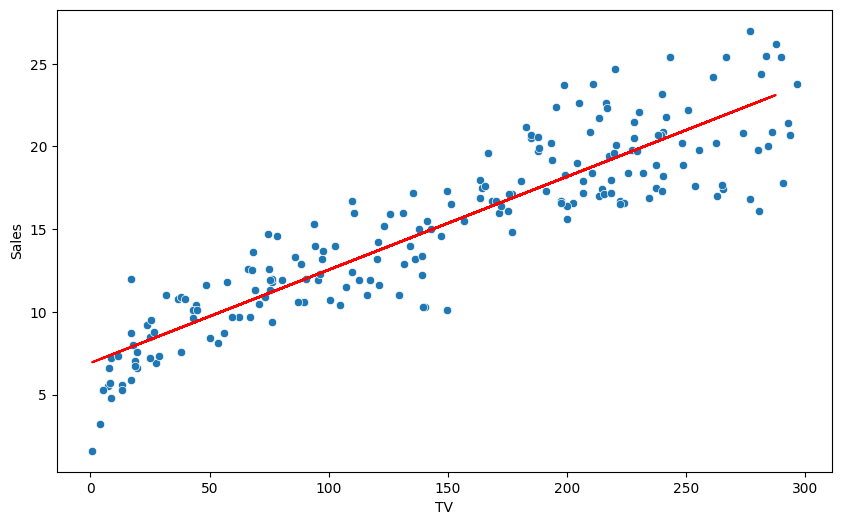

In [261]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

## Modelni baholaymiz

In [262]:
x_test = np.asanyarray(test_set[['TV']])
# test_set dan 'size' ustunini olib, uni NumPy array'ga o'giradi va x_test ga saqlaydi. Bu modelning bashoratlari uchun kiritma ma'lumot hisoblanadi.
y_test = np.asanyarray(test_set[['Sales']])
# test_set dan 'price' ustunini olib, uni NumPy array'ga o'giradi va y_test ga saqlaydi. Bu modelning bashoratlarini solishtirish uchun haqiqiy narxlar hisoblanadi.

# np.asanyarray - bu NumPy kutubxonasidagi funksiya bo'lib, u kiritilgan ma'lumotni array (massiv) ga aylantiradi.

In [263]:
x_test[:10]

array([[163.3],
       [195.4],
       [292.9],
       [ 11.7],
       [220.3],
       [ 75.1],
       [216.8],
       [ 50. ],
       [222.4],
       [175.1]])

In [264]:
y_test[:10]

array([[16.9],
       [22.4],
       [21.4],
       [ 7.3],
       [24.7],
       [12.6],
       [22.3],
       [ 8.4],
       [16.5],
       [16.1]])

In [265]:
y_predict = LR_model.predict(x_test)

In [266]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=1.783970180685482
RMSE=np.float64(2.2253143236720083)



## Bashorat qilingan va haqiqiy qiymatlarni taqqoslash natijalari

In [267]:
y_test[:5]

array([[16.9],
       [22.4],
       [21.4],
       [ 7.3],
       [24.7]])

In [268]:
y_predict[:5]

array([[16.10799649],
       [17.91634288],
       [23.40898378],
       [ 7.56764408],
       [19.31907886]])

In [269]:
TV = pd.DataFrame(x_test, columns=['TV'])

y_test_df = pd.DataFrame(y_test, columns=['Actual Sales'])
y_predict_df = pd.DataFrame(y_predict, columns=['Predicted Sales'])

added_df = pd.concat([TV, y_test_df, y_predict_df], axis=1)
added_df

,TV,Actual Sales,Predicted Sales
0,163.3,16.9,16.107996
1,195.4,22.4,17.916343
2,292.9,21.4,23.408984
3,11.7,7.3,7.567644
4,220.3,24.7,19.319079
...,...,...,...
95,149.7,17.3,15.341844
96,131.7,12.9,14.327817
97,57.5,11.8,10.147777
98,240.1,20.9,20.434507


added_df faqat 100 qatorni ko'rsatishi sababi shundaki, u test_set (test to'plami) asosida yaratilgan. Ma'lumotlarni train_test_split funksiyasi yordamida ajratganingizda, test_size=0.50 parametri ishlatildi. Bu degani, umumiy ma'lumotlarning 50% (ya'ni 200 qatorning 50% = 100 qator) test to'plamiga ajratilgan. Shu sababli, added_df faqat test to'plamiga tegishli 100 ta qatorni aks ettiradi.

In [270]:
added_df.shape

(100, 3)